In [25]:
import tensorflow as tf
from tensorflow import keras
fashion_mnist = keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
X_train = (X_train / 255.0).reshape(60000, 28, 28, 1)
X_test = (X_test / 255.0).reshape(10000, 28, 28, 1)
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                   "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [30]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters=16, kernel_size=5, strides=1, padding="same", activation="relu",input_shape=[28, 28, 1]))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Conv2D(filters=16, kernel_size=3, strides=1, padding="same", activation="relu"))
model.add(keras.layers.MaxPool2D(pool_size=2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(50, activation="relu"))
model.add(keras.layers.Dropout(0.5))
model.add(keras.layers.Dense(10, activation="softmax"))
model.compile(loss="sparse_categorical_crossentropy", optimizer="sgd", metrics=["accuracy"])
print(model.summary())

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_31 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_24 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_32 (Conv2D)           (None, 14, 14, 16)        2320      
_________________________________________________________________
max_pooling2d_25 (MaxPooling (None, 7, 7, 16)          0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_31 (Dense)             (None, 50)                39250     
_________________________________________________________________
dropout_9 (Dropout)          (None, 50)              

In [31]:
history = model.fit(X_train, y_train, epochs=20, validation_split=0.1)

Epoch 1/20
1688/1688 [==============================] - 36s 21ms/step - loss: 1.1968 - accuracy: 0.5535 - val_loss: 0.6652 - val_accuracy: 0.7317
Epoch 2/20
1688/1688 [==============================] - 37s 22ms/step - loss: 0.8051 - accuracy: 0.6941 - val_loss: 0.5939 - val_accuracy: 0.7853
Epoch 3/20
1688/1688 [==============================] - 36s 21ms/step - loss: 0.7140 - accuracy: 0.7315 - val_loss: 0.5321 - val_accuracy: 0.8072
Epoch 4/20
1688/1688 [==============================] - 35s 21ms/step - loss: 0.6636 - accuracy: 0.7499 - val_loss: 0.4874 - val_accuracy: 0.8198
Epoch 5/20
1688/1688 [==============================] - 35s 21ms/step - loss: 0.6272 - accuracy: 0.7638 - val_loss: 0.4696 - val_accuracy: 0.8202
Epoch 6/20
1688/1688 [==============================] - 35s 21ms/step - loss: 0.5988 - accuracy: 0.7748 - val_loss: 0.4498 - val_accuracy: 0.8272
Epoch 7/20
1688/1688 [==============================] - 36s 21ms/step - loss: 0.5766 - accuracy: 0.7854 - val_loss: 0.4418 -

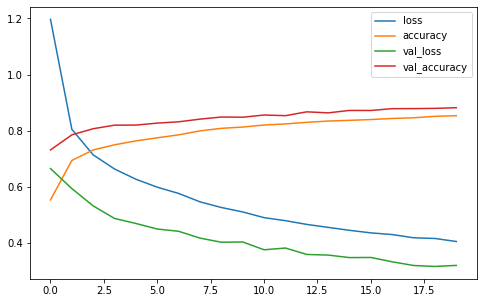

In [32]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))

In [33]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 3s 9ms/step - loss: 0.3365 - accuracy: 0.8790


[0.3364914655685425, 0.8790000081062317]